In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
from collections import defaultdict
import random

In [3]:
# Define the base path to your raw data
# Make sure this path correctly points to your 'data/raw/' directory
DATA_RAW_DIR = '../data/raw/'

# Verify if the directory exists
if not os.path.exists(DATA_RAW_DIR):
    print(f"Error: Data directory not found at {DATA_RAW_DIR}")
    print("Please ensure your raw data is placed inside a 'raw' folder within the 'data' directory.")
else:
    print(f"Data raw directory found: {DATA_RAW_DIR}")

Data raw directory found: ../data/raw/


In [4]:
class_counts = {}
for class_name in os.listdir(DATA_RAW_DIR):
    class_path = os.path.join(DATA_RAW_DIR, class_name)
    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))])
        class_counts[class_name] = num_images

print("Image counts per class:")
for class_name, count in class_counts.items():
    print(f"- {class_name}: {count} images")

total_images = sum(class_counts.values())
print(f"\nTotal images in the dataset: {total_images}")

Image counts per class:
- Tomato_Bacterial_spot: 2127 images
- Tomato_Early_blight: 1000 images
- Tomato_healthy: 1591 images
- Tomato_Late_blight: 1909 images
- Tomato_Leaf_Mold: 952 images
- Tomato_Septoria_leaf_spot: 1771 images
- Tomato_Spider_mites_Two_spotted_spider_mite: 1676 images
- Tomato_Target_Spot: 1404 images
- Tomato_Tomato_mosaic_virus: 373 images
- Tomato_Tomato_YellowLeaf__Curl_Virus: 3208 images

Total images in the dataset: 16011


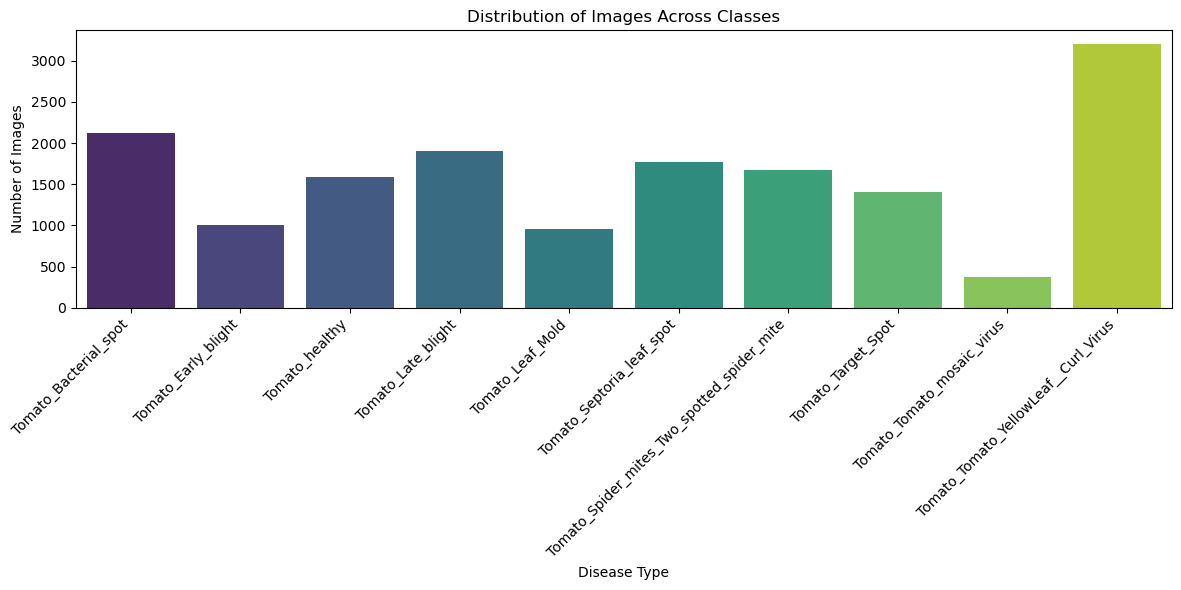

In [6]:
if class_counts:
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(12, 6))
    sns.barplot(x=classes, y=counts, palette='viridis', hue=classes, legend=False)
    plt.xlabel('Disease Type')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Images Across Classes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No classes found to visualize. Check DATA_RAW_DIR path and its contents.")


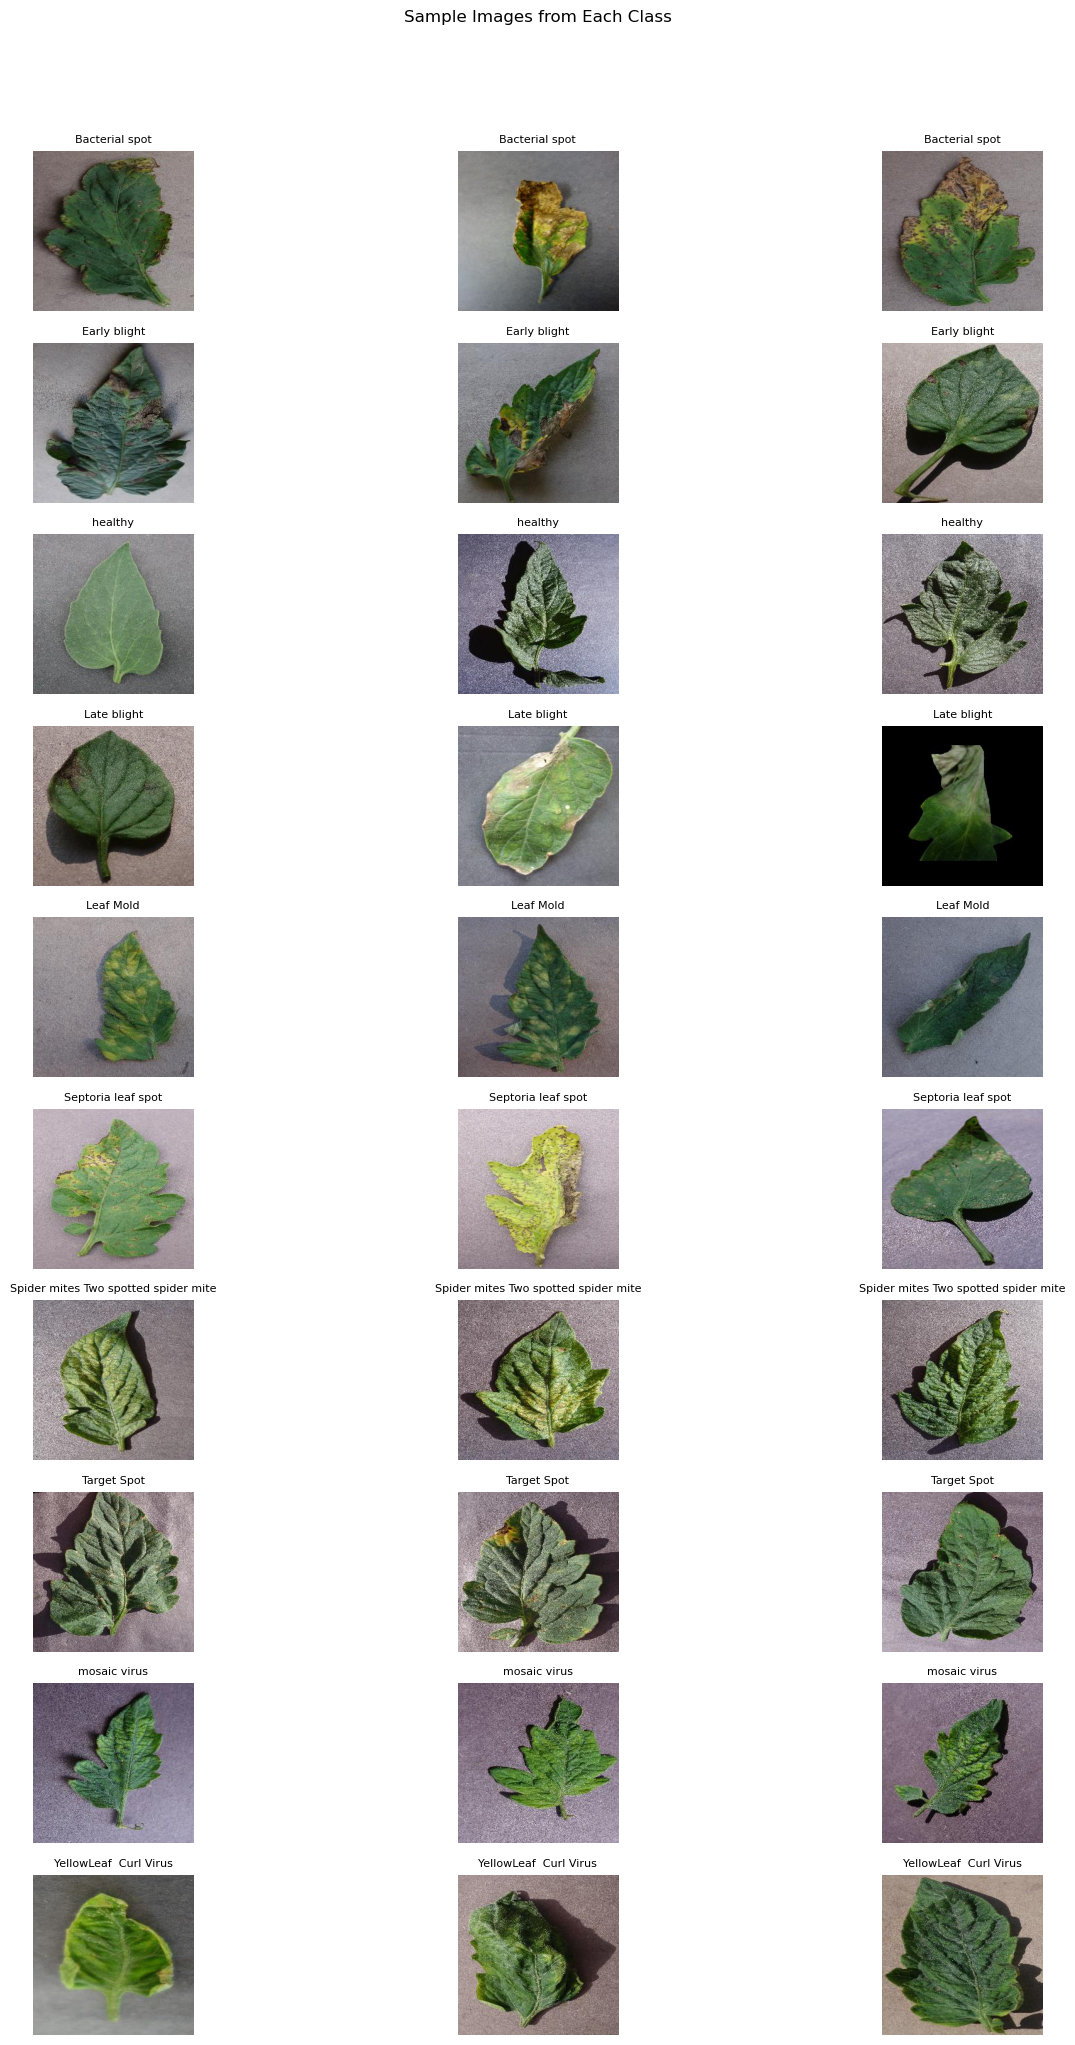

In [7]:
def display_random_samples(data_dir, num_samples_per_class=3):
    plt.figure(figsize=(15, len(class_counts) * 2)) # Adjust figure size dynamically
    plot_idx = 1
    for class_name in class_counts.keys():
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
            random.shuffle(images) # Shuffle to get random samples
            for i in range(min(num_samples_per_class, len(images))):
                img_path = os.path.join(class_path, images[i])
                try:
                    img = Image.open(img_path).convert('RGB') # Convert to RGB to handle grayscale images
                    plt.subplot(len(class_counts), num_samples_per_class, plot_idx)
                    plt.imshow(img)
                    plt.title(f"{class_name.replace('Tomato_', '').replace('_', ' ')}", fontsize=8)
                    plt.axis('off')
                except Exception as e:
                    print(f"Could not load image {img_path}: {e}")
                plot_idx += 1
    plt.suptitle('Sample Images from Each Class', y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
    plt.show()

if class_counts:
    display_random_samples(DATA_RAW_DIR)
else:
    print("No images found to display samples. Check DATA_RAW_DIR path and its contents.")

In [8]:
image_dimensions = defaultdict(int)
total_images_processed_for_dims = 0

# Limit the number of images to process for dimensions to avoid long runtimes on very large datasets
MAX_IMAGES_FOR_DIM_CHECK = 1000 # Process a maximum of 1000 images for dimension checks

for class_name in class_counts.keys():
    class_path = os.path.join(DATA_RAW_DIR, class_name)
    if os.path.isdir(class_path):
        images_in_class = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
        # Only process a subset if there are many images
        for img_file in random.sample(images_in_class, min(len(images_in_class), MAX_IMAGES_FOR_DIM_CHECK // len(class_counts.keys()) or 1)):
            img_path = os.path.join(class_path, img_file)
            try:
                with Image.open(img_path) as img:
                    dimensions = img.size # (width, height)
                    image_dimensions[dimensions] += 1
                    total_images_processed_for_dims += 1
            except Exception as e:
                print(f"Could not read dimensions for {img_path}: {e}")
                
if image_dimensions:
    print(f"Dimensions found (from a sample of {total_images_processed_for_dims} images):")
    for dim, count in sorted(image_dimensions.items()):
        print(f"- {dim} (Width, Height): {count} images")

    # If there are many different dimensions, it indicates a need for resizing during preprocessing.
    if len(image_dimensions) > 1:
        print("\nObservation: Images have varying dimensions. Resizing will be necessary during preprocessing.")
    else:
        print("\nObservation: Images appear to have consistent dimensions. Still, resizing to a standard input size for the model might be beneficial.")
else:
    print("No image dimensions could be determined. Check DATA_RAW_DIR path and image files.")

Dimensions found (from a sample of 1000 images):
- (256, 256) (Width, Height): 1000 images

Observation: Images appear to have consistent dimensions. Still, resizing to a standard input size for the model might be beneficial.


In [10]:
print("Data exploration complete. Key observations:")
if class_counts:
    print(f"- Total images: {total_images}")
    if len(class_counts) > 0 and max(class_counts.values()) / min(class_counts.values()) > 2: # Simple imbalance check
        print("- Potential class imbalance detected. Consider strategies like augmentation or weighted loss during training.")
    else:
        print("- Class distribution appears relatively balanced.")
if image_dimensions:
    if len(image_dimensions) > 1:
        print("- Images have varying resolutions. A preprocessing step to resize all images to a consistent dimension will be crucial.")
    else:
        print("- Images largely share the same resolution.")
print("\nThese insights will inform the data preprocessing and model training steps.")

Data exploration complete. Key observations:
- Total images: 16011
- Potential class imbalance detected. Consider strategies like augmentation or weighted loss during training.
- Images largely share the same resolution.

These insights will inform the data preprocessing and model training steps.
